<a href="https://colab.research.google.com/github/alimoorreza/CS167-notes/blob/main/Day02_Pandas_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day02
## 🐼 Pandas Tutorial

#### CS167: Machine Learning, Fall 2023

Tuesday, September 5th, 2023

📆 [Course Schedule](https://analytics.drake.edu/~reza/teaching/cs167_fall23/cs167_schedule.html) | 📜 [Syllabus](https://analytics.drake.edu/~reza/teaching/cs167_fall23/cs167_syllabus_fall23.pdf)

## Admin Stuff:

Office Hours (when2meet outcomes):
- Monday: 3 pm - 5 pm
- Tuesday and Wednesday: 3:30 pm - 5 pm

## Overview of Day02:
<!--- Notebook #1 setup walkthrough-->
- Pandas Tutorial
- Exercises for Pandas

## PollEverywhere Review Question

# 🐼 Pandas
__Pandas__ is a super powerful Python data analysis library.
- it's built on top of another super powerful libray called `numpy`

Using Google Colab, `pandas` should already be installed. If you see `In [*]` next to a cell, it means your computer is working on the task.

In [ ]:
# The first step is to mount your Google Drive to your Colab account.
#You will be asked to authorize Colab to access your Google Drive. Follow the steps they lead you throuh.

from google.colab import drive
drive.mount('/content/drive')

#you should be able to run this without any issue.
import pandas as pd

Mounted at /content/drive


## Overview of Pandas Tutorial

Three main goals:
1. __Overview__ of Pandas
    - Datatypes `DataFrame` and `Series`
    - helpful functions
2. Select __columns__ in DataFrames
3. Select __rows__ in DataFrames
4. Select __subsets__ of the DataFrame (both rows and columns).

##  Pandas Datatypes: `DataFrame` and `Series`

In `pandas`,there are two main datatypes, `DataFrame` and `Series`:

Let's start with `DataFrame`

[Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) defines `DataFrames` as:
> Two-dimensional, size-mutable, potentially heterogeneous tabular data.

- basically, think of `DataFrames` as our excel sheets--two dimensional, tabular data.
- Each column has a name, and you can use these names to filter and create subsets of data.
- often, you'll see `DataFrames` abbreviated to `df`.

## Creating a DataFrame using `pd.read_csv()`:
While you can create a DataFrame from scratch, most often we'll be importing data from a `.csv` file:
- pandas has a helpful function for this: `pd.read_csv()`, which takes the path to the csv file as an argument [[documentation]](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

In [ ]:
#change this path to point to where your data is:
# if you're using colab it should be something like: '/content/drive/MyDrive/CS167/datasets/restaurant.csv'

import pandas as pd
path = '/content/drive/MyDrive/cs167_fall23/datasets/restaurant.csv'

restaurant_data = pd.read_csv(path)
print('data is a ', type(restaurant_data))

data is a  <class 'pandas.core.frame.DataFrame'>


## Other ways of creating DataFrames:
The syntax for creating a DataFrame from scratch looks like this:
- `pandas.DataFrame(data, index, columns)`


In [ ]:
df = pd.DataFrame() # creates an empty DataFrame
print(df)

Empty DataFrame
Columns: []
Index: []


In [ ]:
# initialize list elements
data_list = [10, 20, 30, 40, 50, 60]
# Create the pandas DataFrame with column name is provided explicitly
df_1 = pd.DataFrame(data_list, columns=['numbers'])
print('size of the dataframe df_2', df_1.shape)
# print dataframe
df_1

size of the dataframe df_2 (6, 1)


,numbers
0,10
1,20
2,30
3,40
4,50
5,60


In [ ]:
# Create the pandas DataFrame with column name is provided explicitly
data_dict = {'col1':[1,2,3], 'col2':[4,5,6], 'col3':[7,8,9]}
df_2 = pd.DataFrame(data_dict)
print('size of the dataframe df_2', df_2.shape)
# print dataframe
df_2

size of the dataframe df_2 (3, 3)


,col1,col2,col3
0,1,4,7
1,2,5,8
2,3,6,9


## Creating DataFrame from 2D list:

In [ ]:
# initialize list of lists (each inner list corresponds to one row in the DataFrame)
data_2d_list = [['reza', 1], ['chris', 2], ['eric', 3]]

# Create the pandas DataFrame
df_3 = pd.DataFrame(data_2d_list, columns=['name', 'score'])

# print dataframe.
df_3


,name,score
0,reza,1
1,chris,2
2,eric,3


### 📣 Helpful Method Alert: `df.head()`

The `.head()` method can be called on any DataFrame, and by default will display the first 5 lines rows of the data, as well as the names of the columns.
- if you want it to display more than 5 rows, you can provide a number as an argument to the method.

In IPython notebooks, whatever you leave at the end of a cell will automatically output.

So, when you put those two facts together, you get this nifty functionality:

In [ ]:
#change this path to point to where your data is:
# if you're using colab it should be something like below:
path = '/content/drive/MyDrive/cs167_fall23/datasets/restaurant.csv'

# read the data from the csv file
df_restaurant = pd.read_csv(path)

# show the dataframe
df_restaurant.head()

,alt,bar,fri,hun,pat,price,rain,res,type,est,target
0,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
2,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
3,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
4,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No


### 📣 Helpful Attribute Alert: `df.shape`
Want to know the dimensions of your DataFrame? Use `df.shape`

In [ ]:
df_restaurant.shape

(12, 11)

## Columns Names

Want to see a list of all of the columns in your dataset? Try using `df.columns`

In [ ]:
col = df_restaurant.columns
col

Index(['alt', 'bar', 'fri', 'hun', 'pat', 'price', 'rain', 'res', 'type',
       'est', 'target'],
      dtype='object')

If there are no spaces in the name of a column, you can also reference it using dot notation like so:

In [ ]:
df_restaurant.type

0      French
1        Thai
2      Burger
3        Thai
4      French
5     Italian
6      Burger
7        Thai
8      Burger
9     Italian
10       Thai
11     Burger
Name: type, dtype: object

## Selecting Rows in DataFrames using `loc` and `iloc`:
Simply put:
- `loc` gets DataFrame rows and columns by __labels/names__
- `iloc` gets DataFrame rows and columns by __index/position__

In [ ]:
# load a new csv file 'titanic.csv'. you can find it on Blackboard under datasets module
path = '/content/drive/MyDrive/cs167_fall23/datasets/titanic.csv'

# read the file into a dataframe
df_titanic = pd.read_csv(path)
print('data.shape: ', df_titanic.shape)
# show the dataframe
df_titanic[880:885]

data.shape:  (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
print(df_titanic.loc[880])   # 880 is really a "name", not a number

survived                 1
pclass                   2
sex                 female
age                   25.0
sibsp                    0
parch                    1
fare                  26.0
embarked                 S
class               Second
who                  woman
adult_male           False
deck                   NaN
embark_town    Southampton
alive                  yes
alone                False
Name: 880, dtype: object


Let's take a subset of titanic and try to use `loc` and `iloc`:

In [ ]:
subset = df_titanic.loc[800:805]
print(subset)

     survived  pclass     sex    age  sibsp  parch      fare embarked   class  \
800         0       2    male  34.00      0      0   13.0000        S  Second   
801         1       2  female  31.00      1      1   26.2500        S  Second   
802         1       1    male  11.00      1      2  120.0000        S   First   
803         1       3    male   0.42      0      1    8.5167        C   Third   
804         1       3    male  27.00      0      0    6.9750        S   Third   
805         0       3    male  31.00      0      0    7.7750        S   Third   

       who  adult_male deck  embark_town alive  alone  
800    man        True  NaN  Southampton    no   True  
801  woman       False  NaN  Southampton   yes  False  
802  child       False    B  Southampton   yes  False  
803  child       False  NaN    Cherbourg   yes  False  
804    man        True  NaN  Southampton   yes   True  
805    man        True  NaN  Southampton    no   True  


In [ ]:
subset.loc[800] # will show the 1th row in the DataFrame called 'subset'

survived                 0
pclass                   2
sex                   male
age                   34.0
sibsp                    0
parch                    0
fare                  13.0
embarked                 S
class               Second
who                    man
adult_male            True
deck                   NaN
embark_town    Southampton
alive                   no
alone                 True
Name: 800, dtype: object

In [ ]:
subset.loc[805] # will show the 6th row in the DataFrame called 'subset'

survived                 0
pclass                   3
sex                   male
age                   31.0
sibsp                    0
parch                    0
fare                 7.775
embarked                 S
class                Third
who                    man
adult_male            True
deck                   NaN
embark_town    Southampton
alive                   no
alone                 True
Name: 805, dtype: object

In [ ]:
subset.loc[806] # DataFrame called 'subset' has only 6 rows, hence ERROR

KeyError: ignored

In [ ]:
subset.iloc[5]  #works

survived                 0
pclass                   3
sex                   male
age                   31.0
sibsp                    0
parch                    0
fare                 7.775
embarked                 S
class                Third
who                    man
adult_male            True
deck                   NaN
embark_town    Southampton
alive                   no
alone                 True
Name: 805, dtype: object

## Pandas Datatypes: `Series`
- `Series` are 1D arrays with axis labels.
    - Each __row__ in a DataFrame is a `Series`.
    - Each __column__ in a DataFrame is also a `Series`.

In [ ]:
print(type(restaurant_data.iloc[0])) #the first row in the dataframe
print(type(restaurant_data['type'])) #the column 'type' from the dataframe

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


# PollEverywhere Concept Check

# Subsetting Columns

---


<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_fall23/notes/images/day02_subset_cols.png"/ width=600>
</div>

Why might we want a subset of the columns of a DataFrame?

Sometimes you don't need all of the columns and just want to work with a __subset__ of the columns of the original dataset. Other times, you may want to reorder the columns in your dataset.

Here's how you would do either of those:
The syntax for subsetting columns from a DataFrame (`df`) is:
- One column: `df['column_name']`
- Multiple columns: `df[['column1', 'column2', 'target']]`

So, if we wanted to look at the `price` column, we could do:

In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/cs167_fall23/datasets/restaurant.csv'
restaurant_data = pd.read_csv(path)
print('data is a ', type(restaurant_data))
restaurant_data.head()

data is a  <class 'pandas.core.frame.DataFrame'>


,alt,bar,fri,hun,pat,price,rain,res,type,est,target
0,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
2,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
3,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
4,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No


In [ ]:
prices = restaurant_data['price']
prices

0     $$$
1       $
2       $
3       $
4     $$$
5      $$
6       $
7      $$
8       $
9     $$$
10      $
11      $
Name: price, dtype: object

In [ ]:
#prices = restaurant_data[[ 'est','price','target']]
prices = restaurant_data[[ 'alt','fri','pat']]
prices

,alt,fri,pat
0,Yes,No,Some
1,Yes,No,Full
2,No,No,Some
3,Yes,Yes,Full
4,Yes,Yes,Full
5,No,No,Some
6,No,No,None
7,No,No,Some
8,No,Yes,Full
9,Yes,Yes,Full


Imagine you want to only work with `'rain'`, `'hun'`, and `'target'`:

In [ ]:
col_subset = restaurant_data[['rain', 'hun', 'target']]
col_subset.head()

,rain,hun,target
0,No,Yes,Yes
1,No,Yes,No
2,No,No,Yes
3,No,Yes,Yes
4,No,No,No


Maybe you want to re-order your new subset so that `rain` and `hun` are switched:

In [ ]:
reordered = col_subset[['hun', 'rain', 'target']]
reordered.head()

,hun,rain,target
0,Yes,No,Yes
1,Yes,No,No
2,No,No,Yes
3,Yes,No,Yes
4,No,No,No


# PollEverywhere Concept Check

## 💬 Group Exercise:

Download the Titanic Dataset from Blackboard, upload it to a spot in your GoogleDrive, and see if you can make the following subsets:
- make a subset called `ages` that holds the ages of the passengers on the titanic
- create a subset called `titanic_subset` with the columns `survived`, `deck`, `sex`, and `age`, in that order.

## Subsetting Rows in a DataFrame:
<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_fall23/notes/images/day02_subset_rows.png"/ width=600>
</div>
Why might you want a subset of the rows?

Maybe you want only rows that satisfy a certain condition--in the restaurant dataset, maybe:
- Italian Restaurants
- only examples when it didn't rain
- etc.

To understand the syntax for subsetting rows in a DataFrame, we need to understand how conditionals work in Python/Pandas:
- to check whether each row in a dataframe meets a criteria, you can use the following syntax
- it will return a `Series` with `True`/`False`, where rows that are `True` meet the criteria, and `False` do not.

In [ ]:
restaurant_data['type'] == 'French'
#restaurant_data.head()

0      True
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10    False
11    False
Name: type, dtype: bool

Taking this one step further, we can use this boolean Series to filter our rows:
- `subset_rows = df[df['column name'] == 'something']`

In [ ]:
# the conditional from a few slides ago was:
condition = restaurant_data['target'] == 'No'

italian_rest = restaurant_data[condition]
italian_rest

,alt,bar,fri,hun,pat,price,rain,res,type,est,target
1,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
4,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No
6,No,Yes,No,No,None,$,Yes,No,Burger,0-10,No
8,No,Yes,Yes,No,Full,$,Yes,No,Burger,>60,No
9,Yes,Yes,Yes,Yes,Full,$$$,No,Yes,Italian,10-30,No
10,No,No,No,No,None,$,No,No,Thai,0-10,No


In [ ]:
# or in one step:
italian_restaurants = restaurant_data[ restaurant_data['type'] == 'Italian' ]
italian_restaurants

,alt,bar,fri,hun,pat,price,rain,res,type,est,target
5,No,Yes,No,Yes,Some,$$,Yes,Yes,Italian,0-10,Yes
9,Yes,Yes,Yes,Yes,Full,$$$,No,Yes,Italian,10-30,No


# PollEverywhere Concept Check

## Try it out yourself:

See if you can create a subset called `rainy_day`, of rows where it rained.

## Subsetting Columns and Rows

<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_fall23/notes/images/day02_subset_rowsandcols.png"/ width=500>
</div>

Let's imagine we want a subset that contains the ages of people who did not survive the Titanic.

Technically, you have the knowledge now to be able to do this, if you just break it up into two steps
- make a subset, `victims`, of rows where `survived == 0`
- use `victims` to create a second subset that only contains the `'Age'` column.

In [ ]:
# load a new csv file 'titanic.csv'. you can find it on Blackboard under datasets module
path = '/content/drive/MyDrive/cs167_fall23/datasets/titanic.csv'
# read the file into a dataframe
titanic = pd.read_csv(path)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
victims = titanic[titanic['survived'] == 0]
victims.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


In [ ]:
subset = victims['age']
subset.head()

0    22.0
4    35.0
5     NaN
6    54.0
7     2.0
Name: age, dtype: float64

But... we can actually do this on one step if we use `loc`/`iloc`:

In [ ]:
subset = titanic.loc[ titanic.survived == 0, 'age'] #the first arguement is the condition for the rows, the second is the columns
subset.head()


0    22.0
4    35.0
5     NaN
6    54.0
7     2.0
Name: age, dtype: float64

## Some Handy Functions
- `mean()`, `median()`, `sum()`

In [ ]:
#average age of titanic passengers:
titanic.age.mean()
#titanic['age'].mean()

29.69911764705882

In [ ]:
#median ticket fare for titanic passengers:
titanic.fare.median()

14.4542

In [ ]:
#number of survivors
titanic.survived.sum()
total_num_people = titanic.shape[0]
did_not_survive= total_num_people - titanic.survived.sum()
did_not_survive

549

## Some Handy Functions
-  `describe()`, `hist()`, `groupby()`, `unique()`

In [ ]:
#get the unique values of the Deck column
titanic.deck.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

In [ ]:
titanic.groupby(['survived'])['age'].mean()

survived
0    30.626179
1    28.343690
Name: age, dtype: float64

<Axes: >

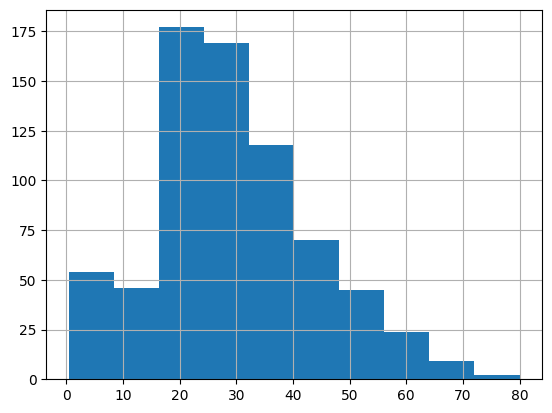

In [ ]:
titanic.age.hist()

In [ ]:
titanic.age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

# Multiple Conditions
What if we want to filter rows by multiple conditions?

Make sure each condition is in parentheses and use the old school `|` and `&` for operators.

In [ ]:
#women and children on titanic
women_and_children = titanic[(titanic.age < 18) | (titanic.sex == 'female')]
women_and_children.shape[0]
women_and_children.survived.sum()

256

In [ ]:
# men who survived
men_who_survived = titanic[(titanic.sex == 'male') & (titanic.survived == 1)]
men_who_survived.shape[0]
men_who_survived.age.mean()

27.276021505376345

# Pandas Exercises 💪🏻🐼
The following cells contain exercises for you to try out on your own and play around with Pandas.

This will help you feel prepared for Notebook #1.

Feel free to work with others around you.

In [ ]:
#selecting columns in dataframes
import pandas
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#import the data:
#make sure the path on the line below corresponds to the path where you put your dataset.
titanic = pandas.read_csv("/content/drive/MyDrive/CS167/datasets/titanic.csv")
titanic.head()

In [ ]:
# what is the data type of titanic?

In [ ]:
# what are the features (column titles) of the titanic dataset?

In [ ]:
# display only the 'embark_town' column of the titanic data

In [ ]:
# what is the data type of the result of the previous cell?

In [ ]:
# what is the "shape" of the data frame?

In [ ]:
# make a subset (call the variable 'subset') of the data that consists of the last 20 rows of the data;
# verify that your subset has 20 rows

In [ ]:
# use loc to print out the data for passenger 890 on the titanic dataframe
# use iloc to print out the data for passenger 890 on the subest dataframe

In [ ]:
# use a markdown cell; describe the difference between loc and iloc

In [ ]:
# create a subset of the data (call the variable 'queenstown_subset') that consists only of passengers with
# a 'embark_town' that is "Queenstown"
# hint: if you get a warning, you may need to explicitly note that you are making a copy of the original data by using
# the .copy() function

In [ ]:
# how many passengers are in queenstown_subset?

In [ ]:
# what is the average fare for all of those in the queenstown_subset?

In [ ]:
# what is the average age for all of those in the queenstown_subset?
# do all of the passengers have an age recorded? What is recorded if there is no age?

In [ ]:
# What does unique(), mean(), isnull(), and fillna() do? Use a markdown cell to write your answers
# Use the Pandas documentation (https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

In [ ]:
# give examples of your use of unique(), mean(), median(), isnull()

In [ ]:
# in the queenstown_subet dataframe
# for each row that does not have an age recorded, replace the NaN value with the calculated average
# hint: don't use a loop; it can be done in 1 line of code using fillna()

In [ ]:
# load in the iris data
# what is the median sepal width of just the Setosas?

In [ ]:
# for those iris that are classified as versicolor and have
# a petal-length > 4, what is the average sepal width?

Congrats! Now you're ready to move on to Notebook #1!

## Demo of Setting up Notebook #1:

1. Click on this [Notebook #1 Link](https://github.com/alimoorreza/CS167-Notebook-1/)
2. Click on the link
3. Read the instructions in the README.md file
4. Open the starter code and get to work.
5. Once you've completed the assignment, download your files to your machine and submit them on CodePost using the link provided on Blackboard.